<a href="https://colab.research.google.com/github/Ashnig/Drug-model-based-on-reviews/blob/main/Drug_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the required libraries


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io


This step is for uploading the required file


In [ ]:
uploaded = files.upload()
df_0 = pd.read_csv(io.BytesIO(uploaded['merged.csv']))

df_0.head()

Saving merged.csv to merged (2).csv


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


Now we are going to analyze the data, in order to see how diverse our dataset is?

In [ ]:
df_0.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [ ]:
df = df_0.assign(Review = df_0.benefitsReview.astype(str) + ', ' + \
                 df_0.sideEffectsReview.astype(str) + ', ' + \
                 df_0.commentsReview.astype(str))

In [ ]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...
...,...,...,...,...,...,...,...,...,...,...
4138,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett..."
4139,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...
4140,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin..."
4141,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines..."


In [ ]:
df.describe()

,Unnamed: 0,rating
count,4143.000000,4143.000000
mean,2081.808834,6.946416
std,1202.018138,2.948868
min,0.000000,1.000000
25%,1041.500000,5.000000
50%,2083.000000,8.000000
75%,3123.500000,9.000000
max,4161.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4143 non-null   object
 7   sideEffectsReview  4141 non-null   object
 8   commentsReview     4135 non-null   object
 9   Review             4143 non-null   object
dtypes: int64(2), object(8)
memory usage: 323.8+ KB


In [ ]:
df.dtypes

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
Review               object
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
Review               0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()


Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
Review               0
dtype: int64

In [ ]:
#how many drugs do we have?

df['urlDrugName'].unique().tolist()

['biaxin',
 'lamictal',
 'depakene',
 'sarafem',
 'accutane',
 'carbamazepine',
 'ultram-er',
 'klonopin',
 'effexor',
 'lyrica',
 'valtrex',
 'provigil',
 'maxalt',
 'xanax',
 'chantix',
 'ranitidine',
 'prednisone',
 'augmentin',
 'zyrtec',
 'methotrexate',
 'fosamax',
 'propranolol',
 'premarin',
 'lovenox',
 'effexor-xr',
 'tirosint',
 'lexapro',
 'renova',
 'cymbalta',
 'omnicef',
 'crestor',
 'naproxen',
 'strattera',
 'prempro',
 'zithromax',
 'kapidex',
 'symbyax',
 'adderall-xr',
 'meridia',
 'paxil',
 'protopic',
 'zofran',
 'serzone',
 'lipitor',
 'wellbutrin-xl',
 'zoloft',
 'acyclovir',
 'provera',
 'atenolol',
 'botox',
 'neurontin',
 'dexedrine',
 'aricept',
 'aciphex',
 'avage',
 'prozac',
 'pristiq',
 'citalopram',
 'adderall',
 'celexa',
 'lamotrigine',
 'abilify',
 'ecotrin',
 'nuvaring',
 'differin',
 'reglan',
 'zocor',
 'atacand',
 'prinivil',
 'retin-a-micro',
 'sustiva',
 'dispermox',
 'naprosyn',
 'ativan',
 'seroquel',
 'zyprexa',
 'efudex',
 'ambien-cr',
 'ta

In [ ]:
#how many drugs do we have?
len(df['urlDrugName'].unique().tolist())

540

Word colud is a popular method which we can use in order to see which words are more important in the dataset.

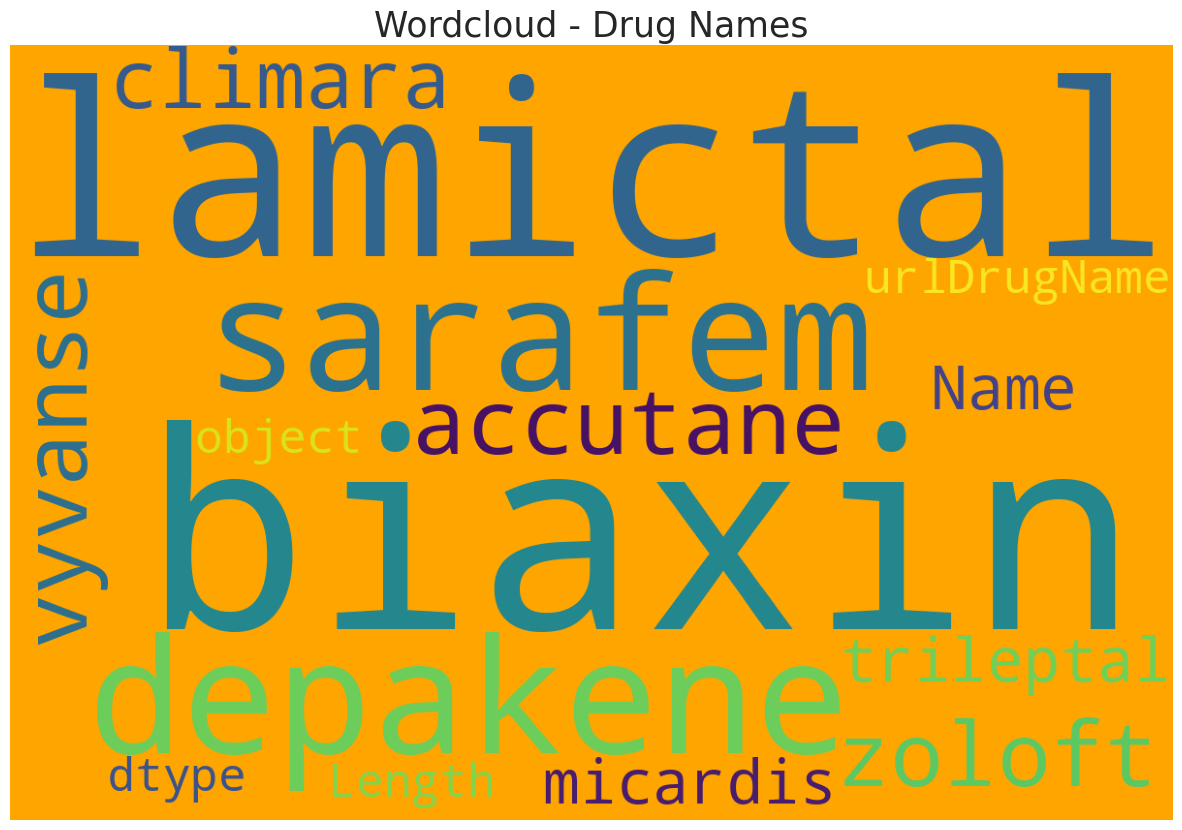

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color= 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df['urlDrugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Wordcloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

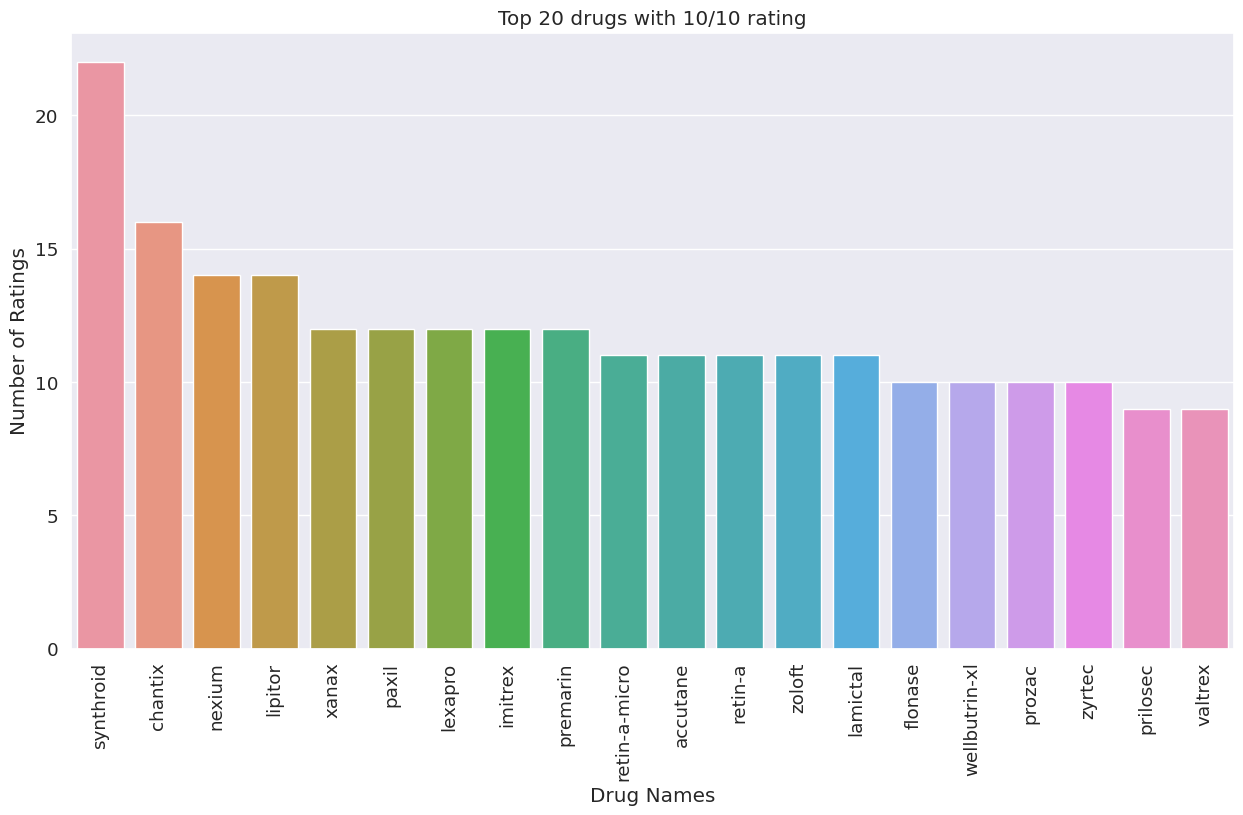

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "urlDrugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel('Number of Ratings')
sns_rating.set_xlabel('Drug Names')
plt.setp(sns_rating.get_xticklabels(), rotation = 90);

This is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Synthroid' is the drug with the highest number of 10/10 rating.

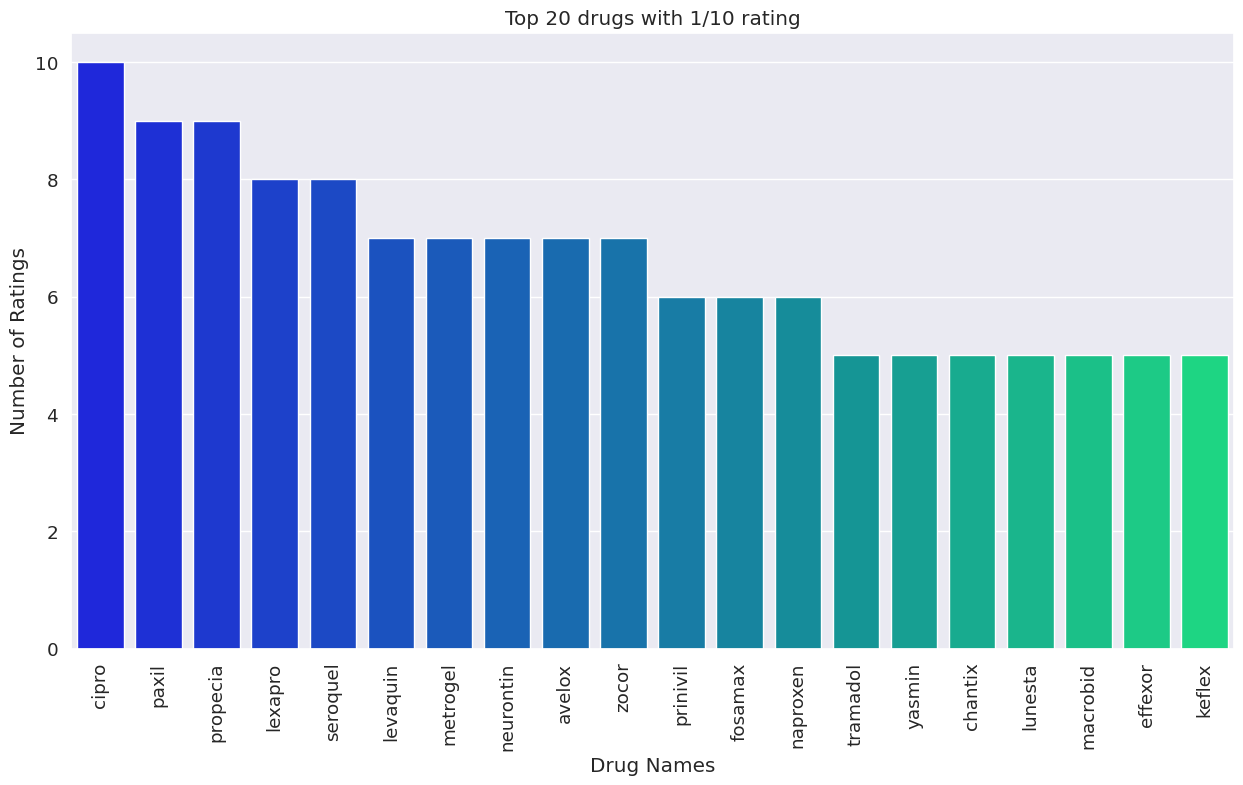

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "urlDrugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel('Number of Ratings')
sns_rating.set_xlabel('Drug Names')
plt.setp(sns_rating.get_xticklabels(), rotation = 90);

this is a bar graph that shows the top 20 drugs given in the data set with a rating of 1/10. 'Cipro' is the drug with the highest number of 1/10 rating about 10.

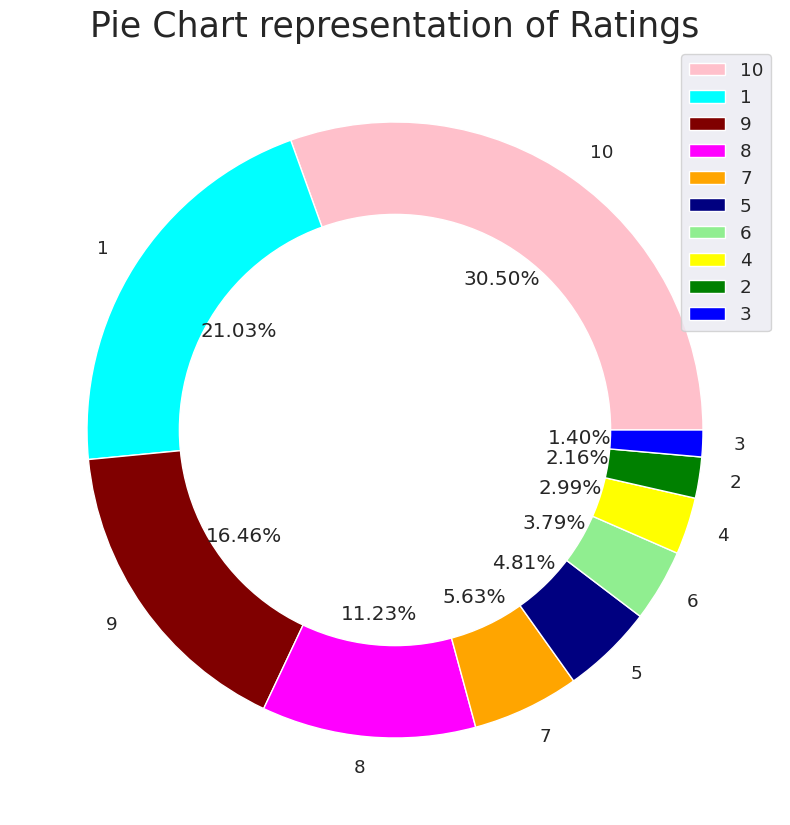

In [ ]:
#making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671, 4811, 3119]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow', 'green', 'blue']

labels = "10", "1", "9", "8", "7", "5", "6", "4", "2", "3"

my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()



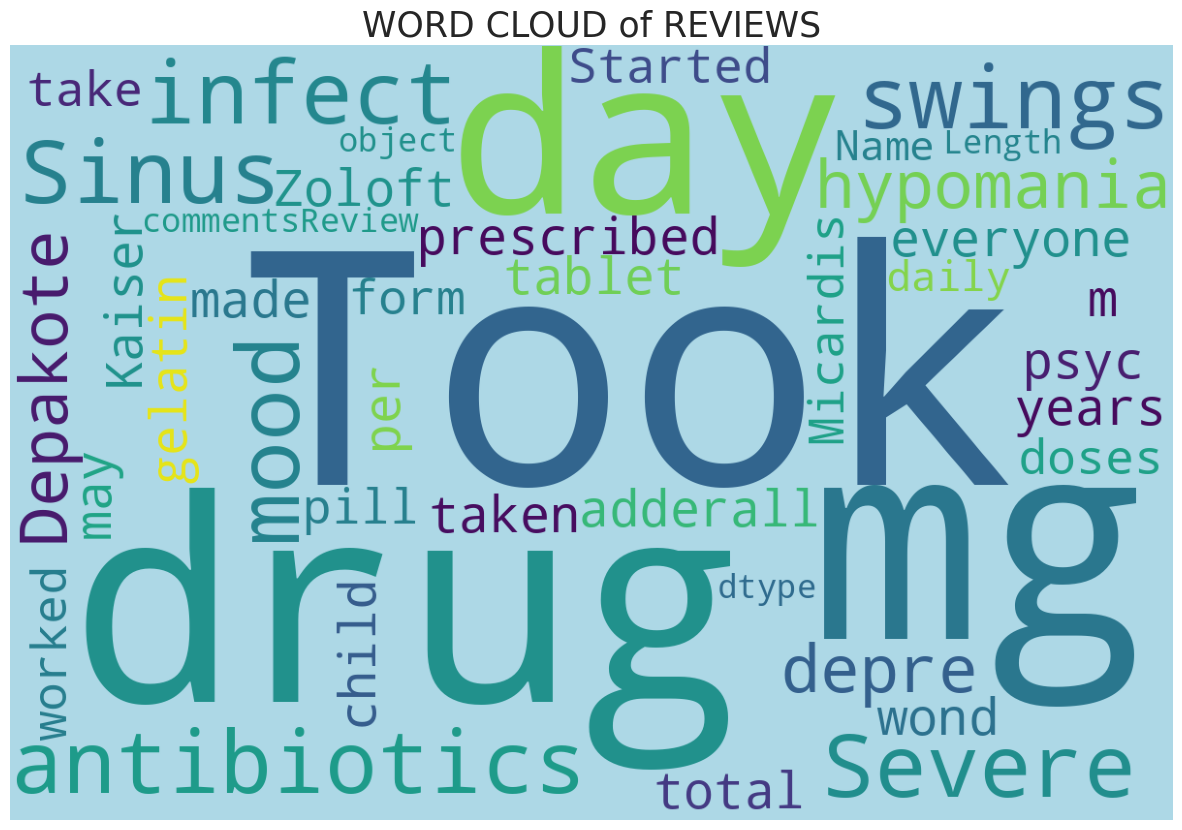

In [ ]:
#let see the words cloud for the reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(df['commentsReview']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD of REVIEWS', fontsize = 25)
print(wordcloud)

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is a word cloud for the reviews


In [ ]:
#let's make a new column review sentiment

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    3235
0.0     897
Name: Review_Sentiment, dtype: int64

In [ ]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...,1.0
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4138,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...",1.0
4139,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...,0.0
4140,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin...",0.0
4141,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines...",1.0


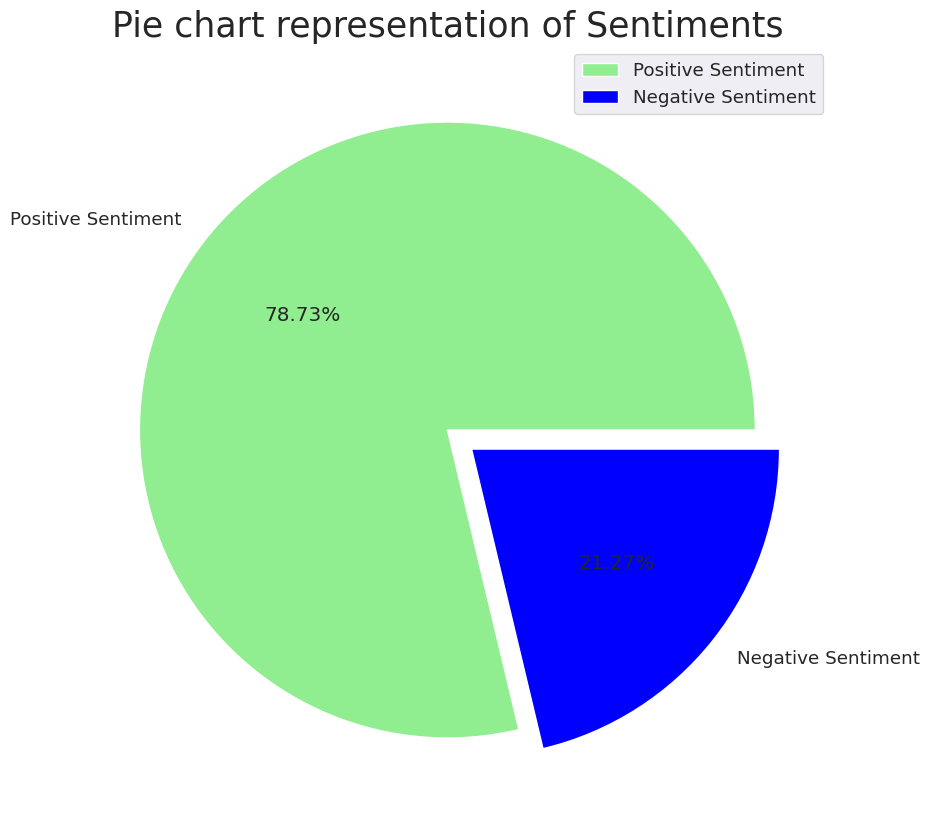

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [2446, 661]
colors = ['lightgreen', 'blue']
labels = "Positive Sentiment", "Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie chart representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

This pie chart represents the sentiments of the reviews


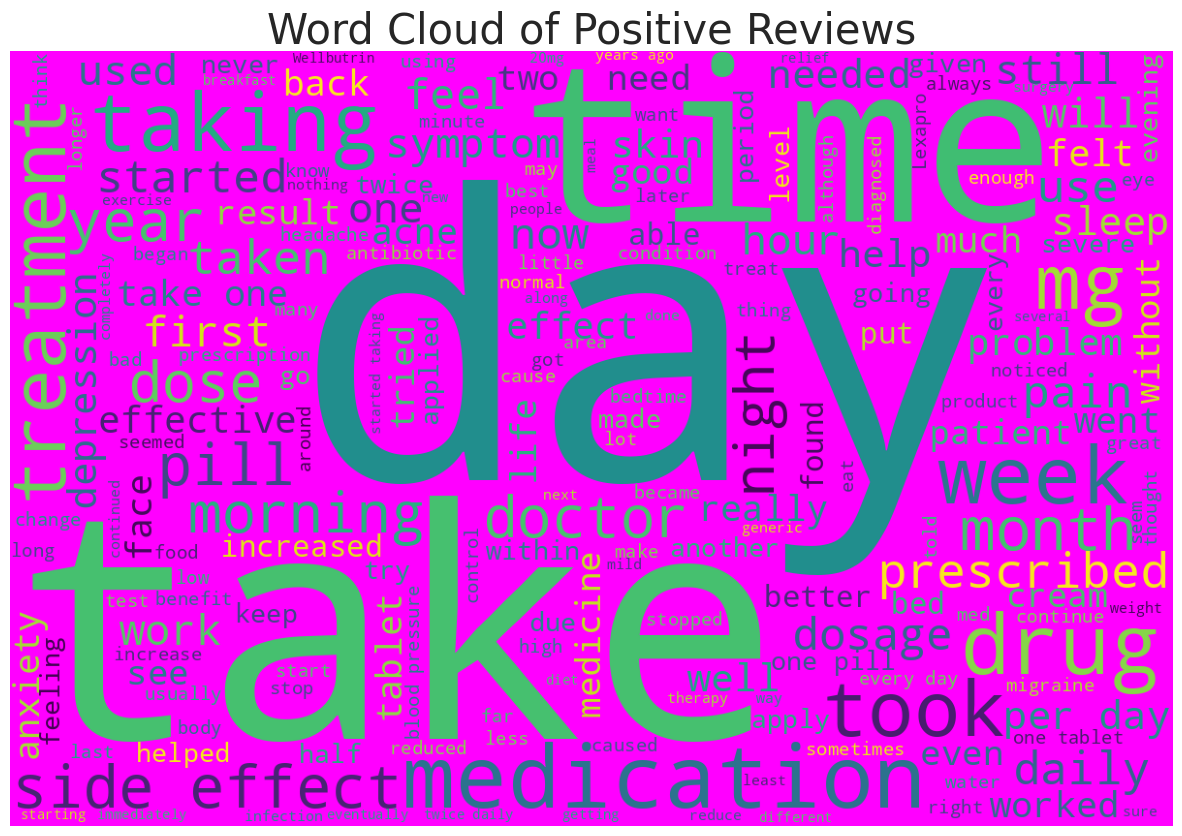

In [ ]:
#making words cloud for the positive sentiments

positive_sentiments = " ".join([text for text in df['commentsReview'][df['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS


stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is word cloud for the positive sentiments


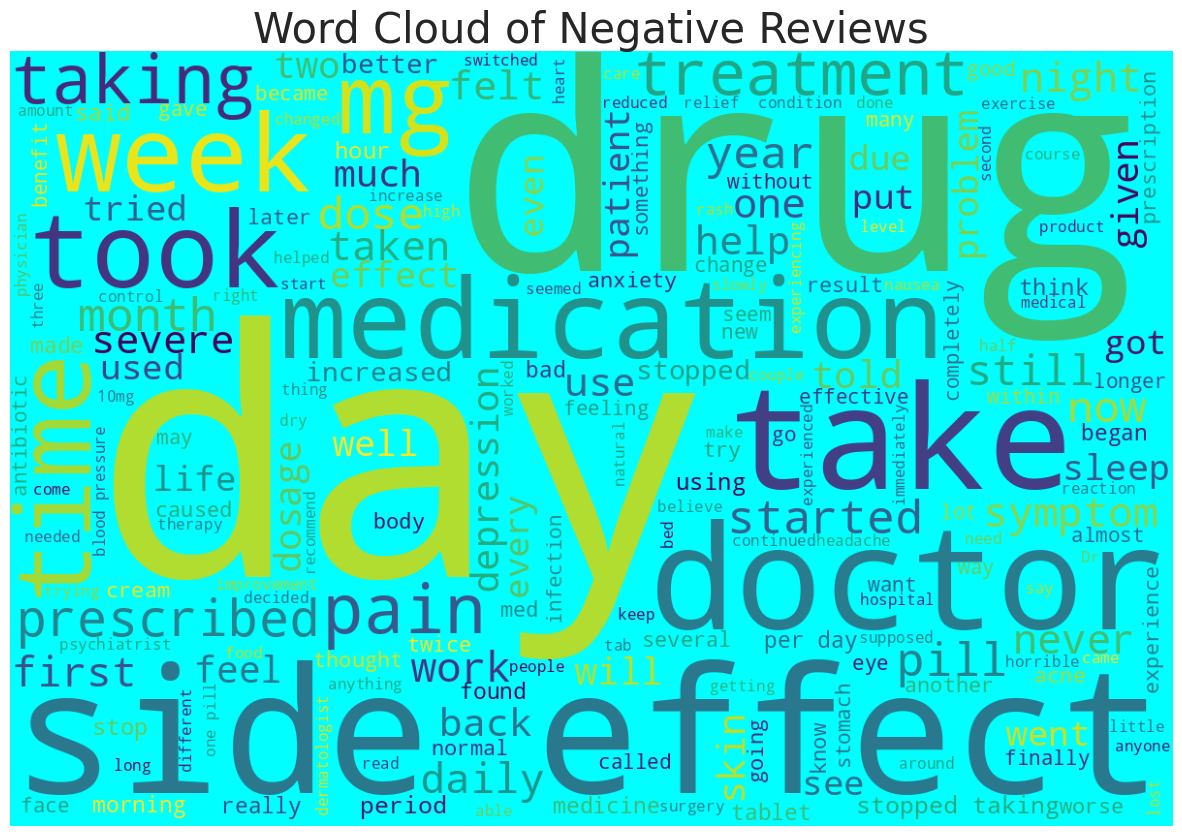

In [ ]:
negative_sentiments = " ".join([text for text in df['commentsReview'][df['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

this is a word cloud for the negative sentiments

Now we will try to filter the reviews by removing some things from the sentences, in order to make it more simple to understand by the model. You can find what we have removed below from all the reviews.

In [ ]:
def review_clean(review):
  #changing to lower case
  lower = review.str.lower()

  #replacing the repeating pattern of &#039;
  pattern_remove = lower.str.replace("&#039;", "")

  #removing all the special characters
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]', ' ')

  #removing all the non ASCII characters
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+', ' ')

  #removing the leading and trailing whitespaces
  whitespace_remove = ascii_remove.str.replace(r'\s+', ' ')

  #Replacing multiple spaces with single space
  multiw_remove = whitespace_remove.str.replace(r'\s+', ' ')

  #Replacing two or more dots with one
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

  return dataframe



In [ ]:
#df['review_clean_cr'] = review_clean(df['commentsReview'])
df['review_clean'] = review_clean(df['Review'])

Again installing some more required libraries

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

#removing the stopwords

stop_words = set(stopwords.words('english'))
#df['review_clean_cr'] = df['review_clean_cr'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


i hvae used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned reviews.


In [ ]:
#removing the word stems using the snowball stemmer
Snow_ball = SnowballStemmer("english")

#df['review_clean_cr'] = df['review_clean_cr'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
df['review_clean'] = df['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))




In [ ]:
df.head(3)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,Review_Sentiment,review_clean
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,1.0,antibiot may destroy bacteria caus sinus infec...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,1.0,lamict stabil serious mood swing one minut cla...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,0.0,initi benefit compar brand name version drug d...


In [ ]:
def sentiment(review):
  #sentiment polarity of the review
  pol = []
  for i in review:
    analysis = TextBlob(i)
    pol.append(analysis.sentiment.polarity)

  return pol

In [ ]:
df['sentiment'] = sentiment(df['Review'])


In [ ]:
df['sentiment_clean'] = sentiment(df['review_clean'])


In [ ]:
#cleaning the reviews without removing the stop words and using snowball stemmer

df['review_clean_ss_1'] = review_clean(df['Review'])
df['sentiment_clean_ss_1'] = sentiment(df['review_clean_ss_1'])

In [ ]:
df = df.dropna(how='any', axis = 0)

In [ ]:
#word count in each review
df['count_word_1'] = df['review_clean_ss_1'].apply(lambda x: len(str(x).split()))

#unique word count
df['count_unique_word_1'] = df['review_clean_ss_1'].apply(lambda x: len(set(str(x).split())))

#letter count
df['count_letters_1'] = df['review_clean_ss_1'].apply(lambda x: len(str(x)))

#puntuation count
df['count punctuations_1'] = df['Review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df['count_words_upper_1'] = df['Review'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df['count_words_title_1'] = df['Review'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df['count_stopwords_1'] = df['Review'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#average length of the words
df['mean_word_len_1'] = df["review_clean_ss_1"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

the new features are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count, 'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review.

In [ ]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'Review', 'Review_Sentiment', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss_1', 'sentiment_clean_ss_1',
       'count_word_1', 'count_unique_word_1', 'count_letters_1',
       'count punctuations_1', 'count_words_upper_1', 'count_words_title_1',
       'count_stopwords_1', 'mean_word_len_1'],
      dtype='object')

now we will make a correlation matrix

In [ ]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Review,...,review_clean_ss_1,sentiment_clean_ss_1,count_word_1,count_unique_word_1,count_letters_1,count punctuations_1,count_words_upper_1,count_words_title_1,count_stopwords_1,mean_word_len_1
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...,The antibiotic may have destroyed bacteria cau...,...,the antibiotic may have destroyed bacteria cau...,-0.145833,44,37,237,9,0,5,19,4.386364
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...,Lamictal stabilized my serious mood swings. On...,...,lamictal stabilized my serious mood swings one...,0.208502,396,219,2138,62,21,46,181,4.398990
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...,Initial benefits were comparable to the brand ...,...,initial benefits were comparable to the brand ...,-0.041862,397,213,2407,62,20,49,174,5.062972
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...,It controlls my mood swings. It helps me think...,...,it controlls my mood swings it helps me think ...,0.361911,75,52,385,15,11,9,35,4.133333
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...,Within one week of treatment superficial acne ...,...,within one week of treatment superficial acne ...,0.126831,111,78,688,19,0,11,36,5.198198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...",...,increased focus attention productivity better ...,0.183796,190,121,994,37,12,14,74,4.231579
4139,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...,...,emotions were somewhat blunted less moodiness ...,-0.049961,441,207,2305,65,35,61,220,4.226757
4140,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,"---, Constant issues with the patch not stayin...",...,constant issues with the patch not staying on...,0.061340,137,97,708,32,9,14,64,4.160584
4141,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,"Controlled complex partial seizures., Dizzines...",...,controlled complex partial seizures dizziness ...,-0.100000,68,51,359,12,2,7,28,4.279412


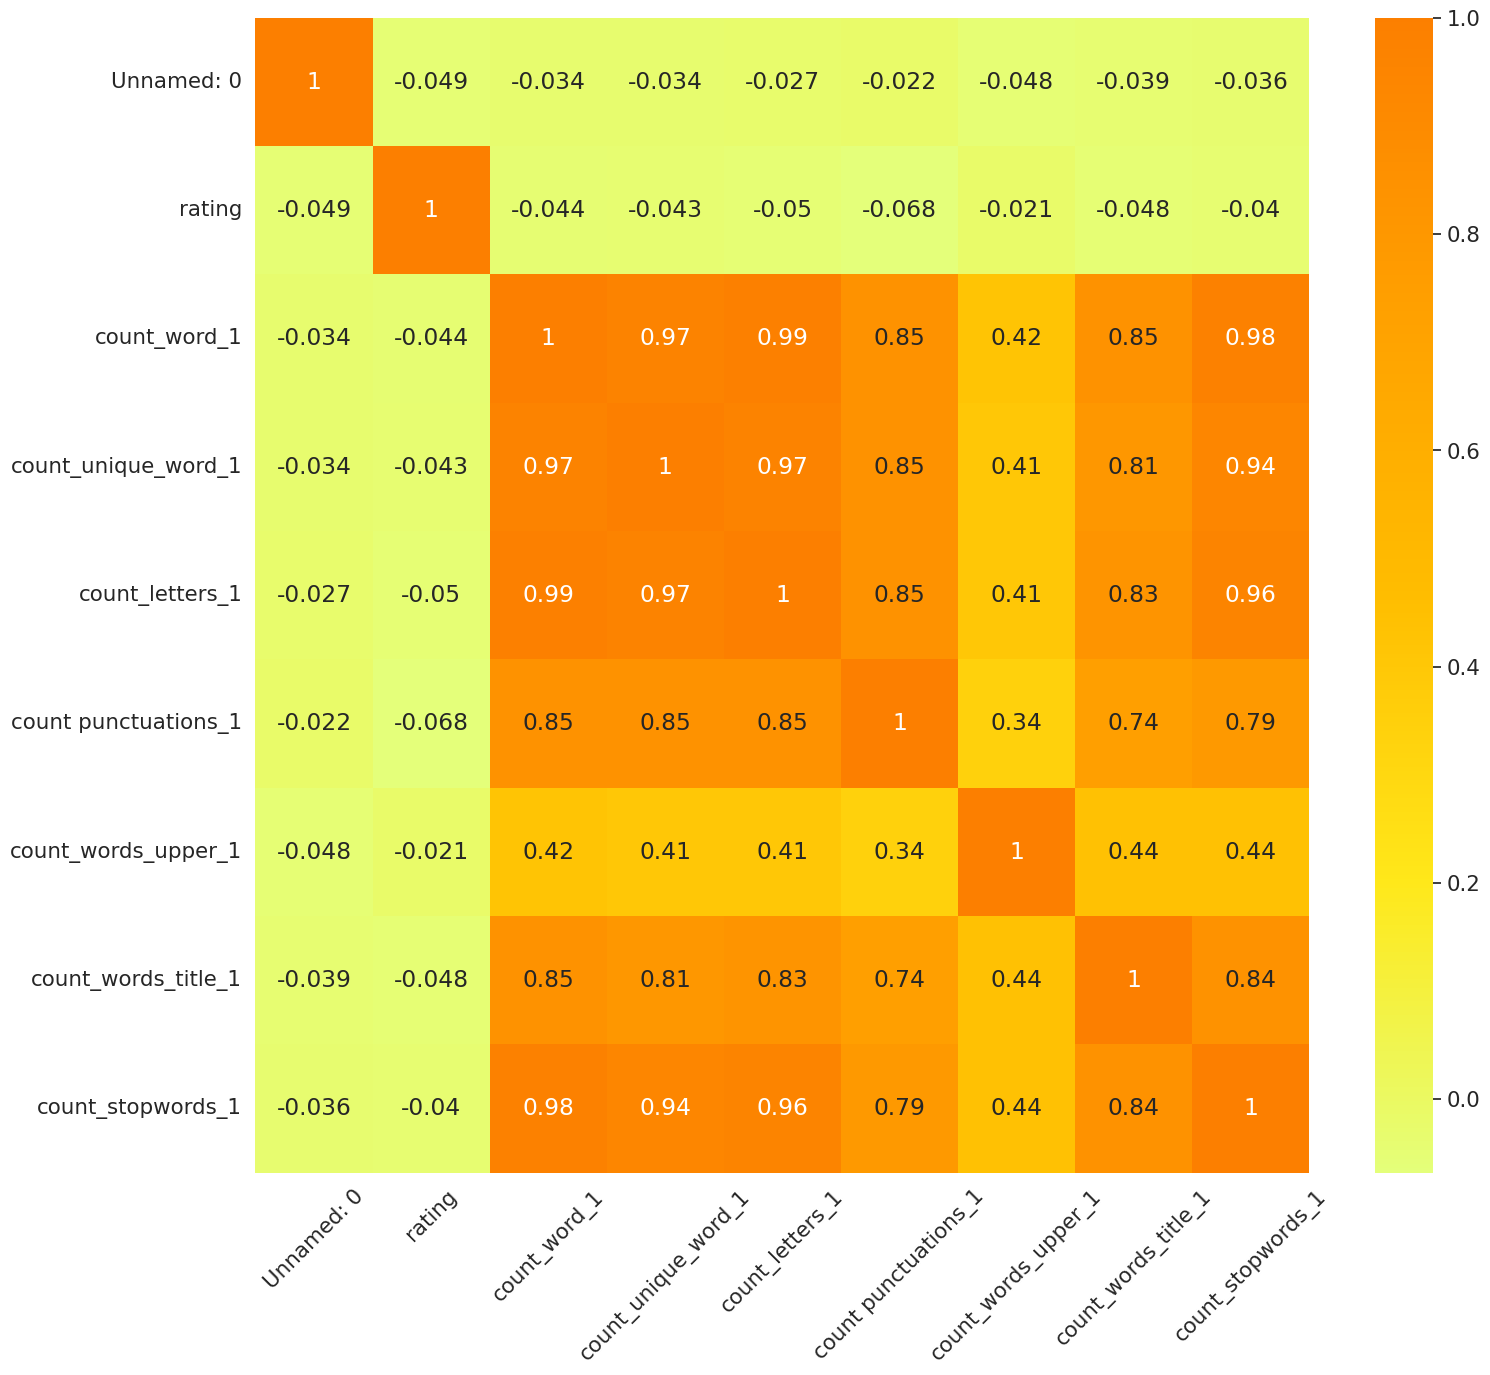

In [ ]:
#correlation heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17, 15]
sns.set(font_scale = 1.4)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

correlation heatmap is plotted using seaborn which contains all the new features engineered and the old features

In [ ]:
#label encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder

label_encoder_feat = {}
for feature in ['urlDrugName', 'condition']:
  label_encoder_feat[feature] = LabelEncoder()
  df[feature] = label_encoder_feat[feature].fit_transform(df[feature])




the label encoder is used to change the categorical values of Drug names and the conditions in to numerical values for the machine learning moddelling.

LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. it has many adavantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.

In [ ]:
#importing libraries for the machine learning model
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [ ]:
#defining features

features = df[['condition', 'sentiment',
                   'sentiment_clean_ss_1', 'count_word_1', 'count_unique_word_1', 'count_letters_1', 'count_words_upper_1',
                   'count_words_title_1', 'count_stopwords_1', 'mean_word_len_1']]

target = df['Review_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(2892, 10)
(1240, 10)


In [ ]:
#Training model - I
clf = LGBMClassifier(n_estimators= 10000,
                     learning_rate = 0.10,
                     num_leaves = 30,
                     subsample = .9,
                     max_depth = 7,
                     reg_alpha = 0.1,
                     reg_lambda = 0.1,
                     min_split_gain = 0.01,
                     min_child_weight=2,
                     silent = -1,
                     verbose=-1,
                     )

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print("the accuracy of the model is: ", accuracy_score(y_test, predictions))
print("the confusion matrix: ")
confusion_matrix(y_test, predictions)

the accuracy of the model is:  0.7653225806451613
the confusion matrix: 


array([[ 50, 223],
       [ 68, 899]])

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

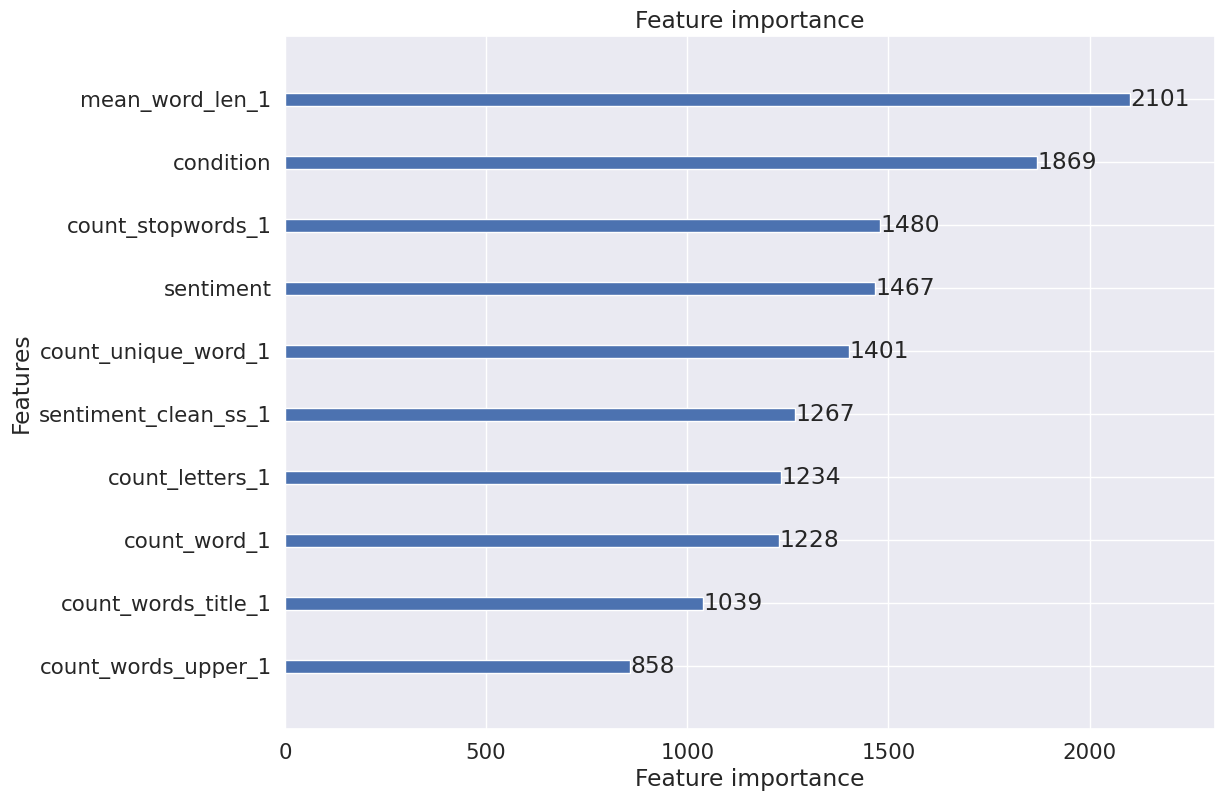

In [ ]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.4)
plot_importance(model)

In [ ]:
y_train

3030    1.0
1705    1.0
4114    1.0
2985    0.0
2615    1.0
       ... 
3451    1.0
466     0.0
3098    1.0
3781    1.0
860     1.0
Name: Review_Sentiment, Length: 2892, dtype: float64

In [ ]:
feat = np.array([[16, 0.047368, 0.047368, 120, 16, 808, 0, 0, 37, 5.733333]])
feat_1 = np.array([[1325, 0.243056, 0.243056, 51, 48, 335, 0, 1, 14, 5.588235]])
pred = model.predict(feat_1)
print(pred)

[1.]


In [ ]:
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print(predictions_2)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

[13:49:20] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator", "num_leaves" } are not used.

[1 1 1 ... 1 1 1]
The Accuracy of the model is :  0.7870967741935484
The confusion Matrix is 


array([[ 25, 248],
       [ 16, 951]])

In [ ]:
pred = {'result' : predictions}
data_1 = pd.DataFrame(pred)
data_1.to_csv('predict.csv')

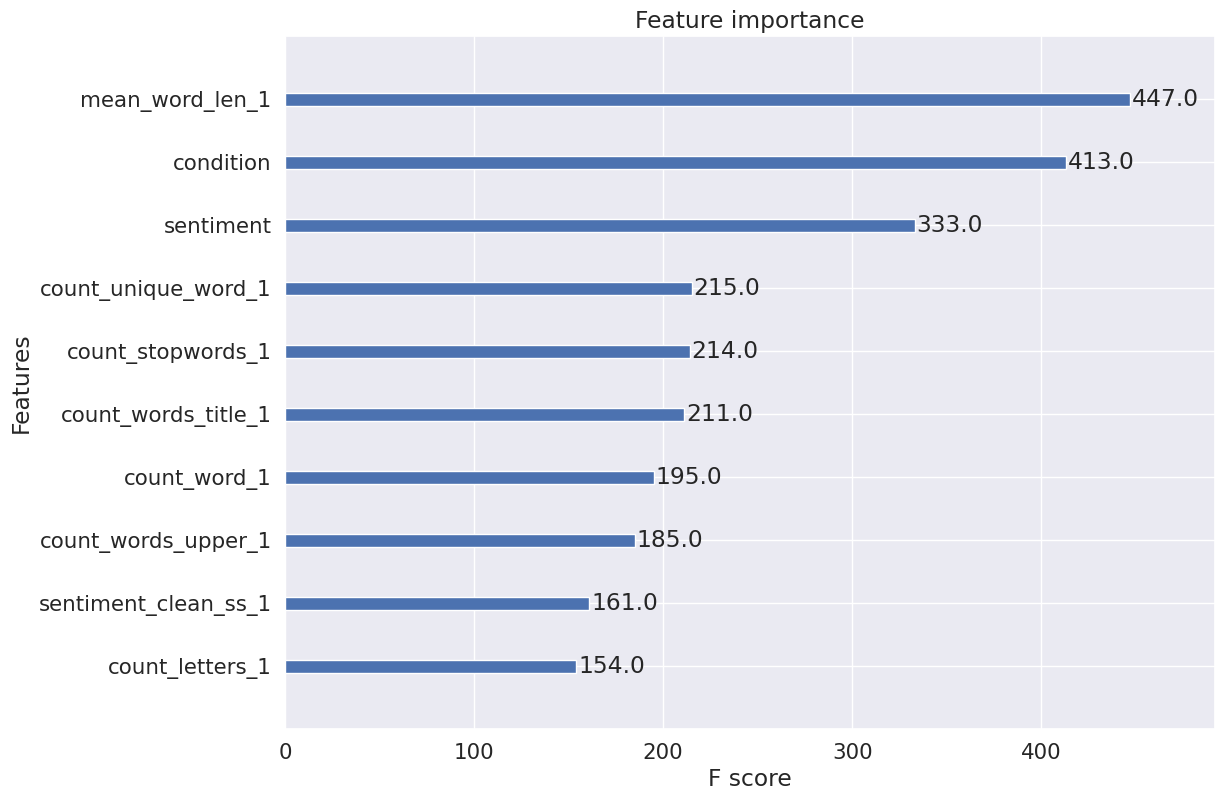

In [ ]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

Streaming output truncated to the last 5000 lines.
5002:	learn: 0.0075684	total: 53.7s	remaining: 53.6s
5003:	learn: 0.0075683	total: 53.7s	remaining: 53.6s
5004:	learn: 0.0075682	total: 53.7s	remaining: 53.6s
5005:	learn: 0.0075682	total: 53.7s	remaining: 53.6s
5006:	learn: 0.0075681	total: 53.7s	remaining: 53.6s
5007:	learn: 0.0075681	total: 53.7s	remaining: 53.6s
5008:	learn: 0.0075680	total: 53.7s	remaining: 53.5s
5009:	learn: 0.0075680	total: 53.7s	remaining: 53.5s
5010:	learn: 0.0075680	total: 53.7s	remaining: 53.5s
5011:	learn: 0.0075680	total: 53.8s	remaining: 53.5s
5012:	learn: 0.0075679	total: 53.8s	remaining: 53.5s
5013:	learn: 0.0075678	total: 53.8s	remaining: 53.5s
5014:	learn: 0.0075678	total: 53.8s	remaining: 53.5s
5015:	learn: 0.0075678	total: 53.8s	remaining: 53.5s
5016:	learn: 0.0075678	total: 53.8s	remaining: 53.5s
5017:	learn: 0.0075678	total: 53.8s	remaining: 53.5s
5018:	learn: 0.0075677	total: 53.9s	remaining: 53.4s
5019:	learn: 0.0075677	total: 53.9s	remaining: 5

array([[ 48, 225],
       [ 84, 883]])

In [ ]:
#finding the most popular drug?

df['urlDrugName'].value_counts()

261    74
356    58
415    55
451    53
531    52
       ..
57      1
10      1
228     1
211     1
315     1
Name: urlDrugName, Length: 540, dtype: int64

In [ ]:
df['urlDrugName'].value_counts().nlargest(20)

261    74
356    58
415    55
451    53
531    52
400    51
167    46
168    46
4      44
97     44
391    43
510    42
264    42
124    41
249    39
147    38
319    38
320    37
160    36
469    35
Name: urlDrugName, dtype: int64

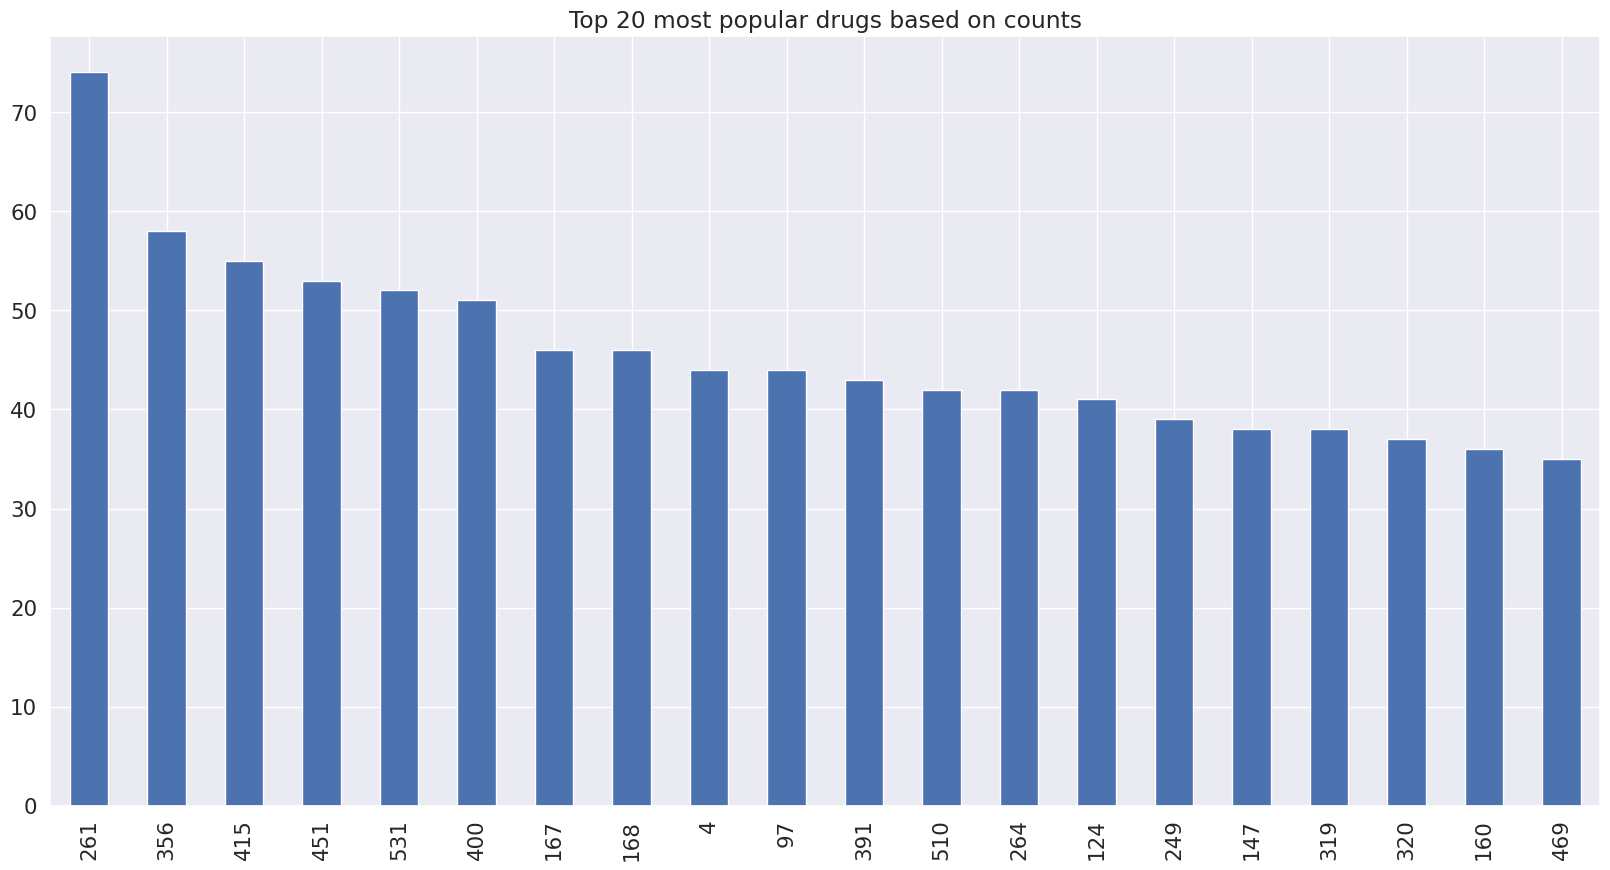

In [ ]:
#top 20 drugs(most popular)
plt.figure(figsize=(20,10))
df['urlDrugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 most popular drugs based on counts')
plt.show()

In [ ]:
df['urlDrugName'].value_counts().nsmallest(20)

178    1
78     1
316    1
229    1
242    1
388    1
468    1
418    1
364    1
448    1
151    1
501    1
267    1
159    1
503    1
227    1
283    1
175    1
11     1
64     1
Name: urlDrugName, dtype: int64

In [ ]:
#Number of conditions
df['condition'].unique()

array([1535,  266,  257, ...,  793, 1084, 1722])

In [ ]:
len(df['condition'].unique().tolist())

1804

In [ ]:
#distribution of conditions
df['condition'].value_counts()

473     302
22      210
151      90
899      75
281      68
       ... 
1457      1
1675      1
612       1
638       1
1722      1
Name: condition, Length: 1804, dtype: int64

In [ ]:
###most common conditions
df['condition'].value_counts().nlargest(20)

473     302
22      210
151      90
899      75
281      68
760      62
108      49
1033     44
59       41
205      41
846      39
1041     37
16       37
772      35
697      35
70       33
829      29
623      29
1535     28
504      26
Name: condition, dtype: int64

<Axes: >

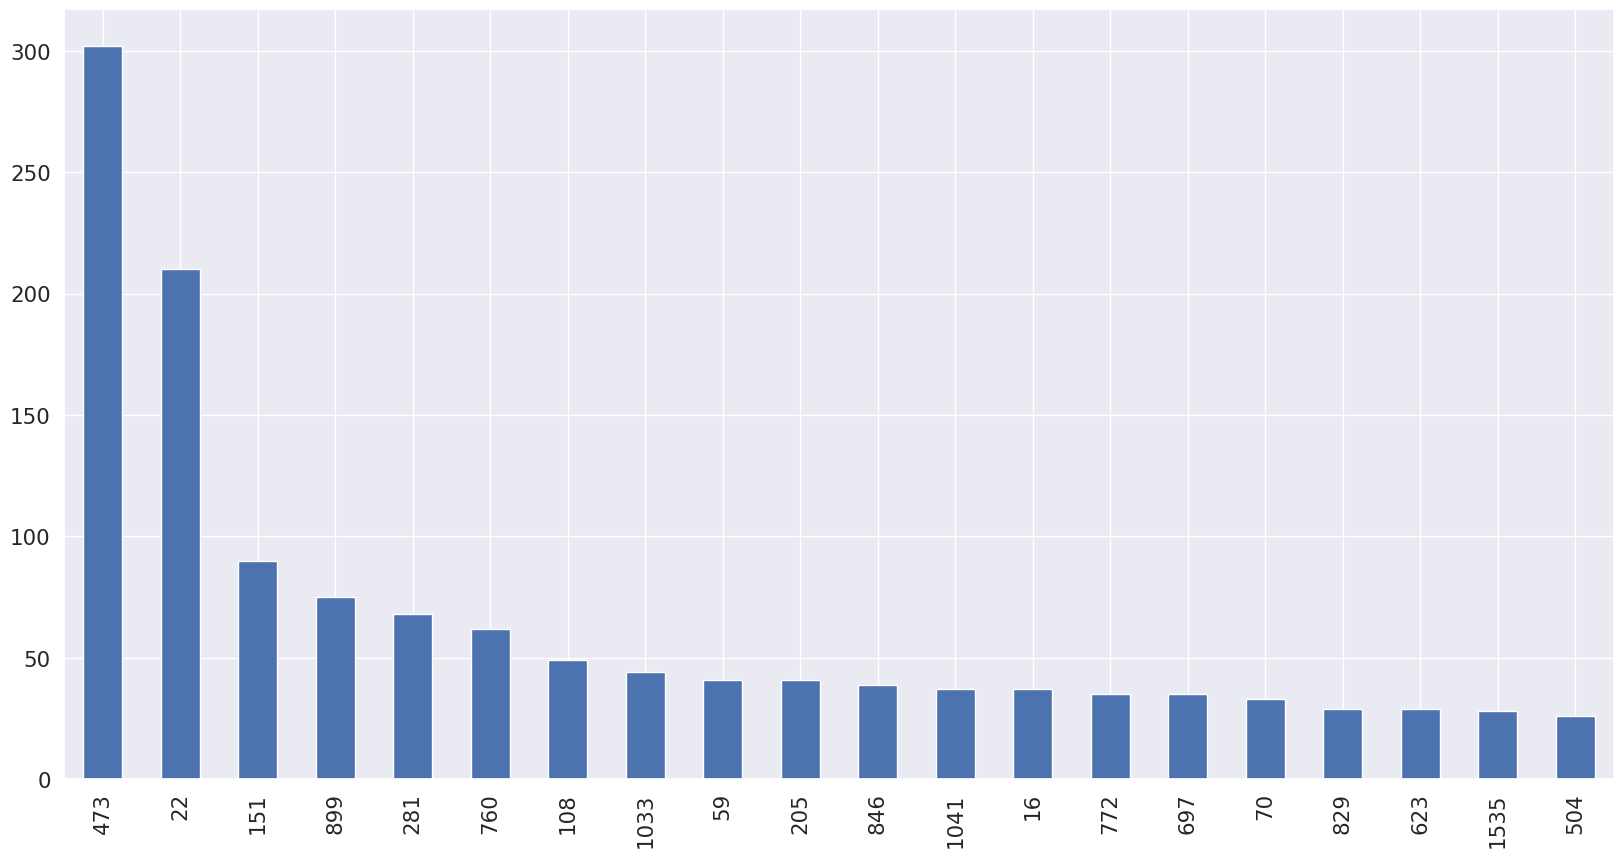

In [ ]:
df['condition'].value_counts().nlargest(20).plot(kind='bar', figsize=(20,10))

In [ ]:
#the most common condition is depression followed by acne, anxiety
df['condition'].value_counts().nsmallest(20)

1521    1
633     1
1268    1
667     1
545     1
62      1
882     1
1572    1
1289    1
202     1
448     1
334     1
862     1
1359    1
56      1
1754    1
1378    1
597     1
208     1
787     1
Name: condition, dtype: int64

In [ ]:
#how many drugs per condition(top 20)
df.groupby('condition')['urlDrugName'].nunique().nlargest(20)

condition
22      38
473     30
760     28
151     27
899     20
829     19
1041    15
59      14
108     14
205     14
266     12
504     12
1195    12
281     11
1033    11
1535    11
199     10
1015    10
1545    10
70       9
Name: urlDrugName, dtype: int64

In [ ]:
df['rating']

0        9
1        9
2        4
3       10
4       10
        ..
4138    10
4139     1
4140     2
4141     8
4142     4
Name: rating, Length: 4132, dtype: int64

In [ ]:
df.groupby('rating').size()

rating
1     419
2     135
3     194
4     149
5     226
6     214
7     471
8     745
9     612
10    967
dtype: int64

<Axes: xlabel='rating'>

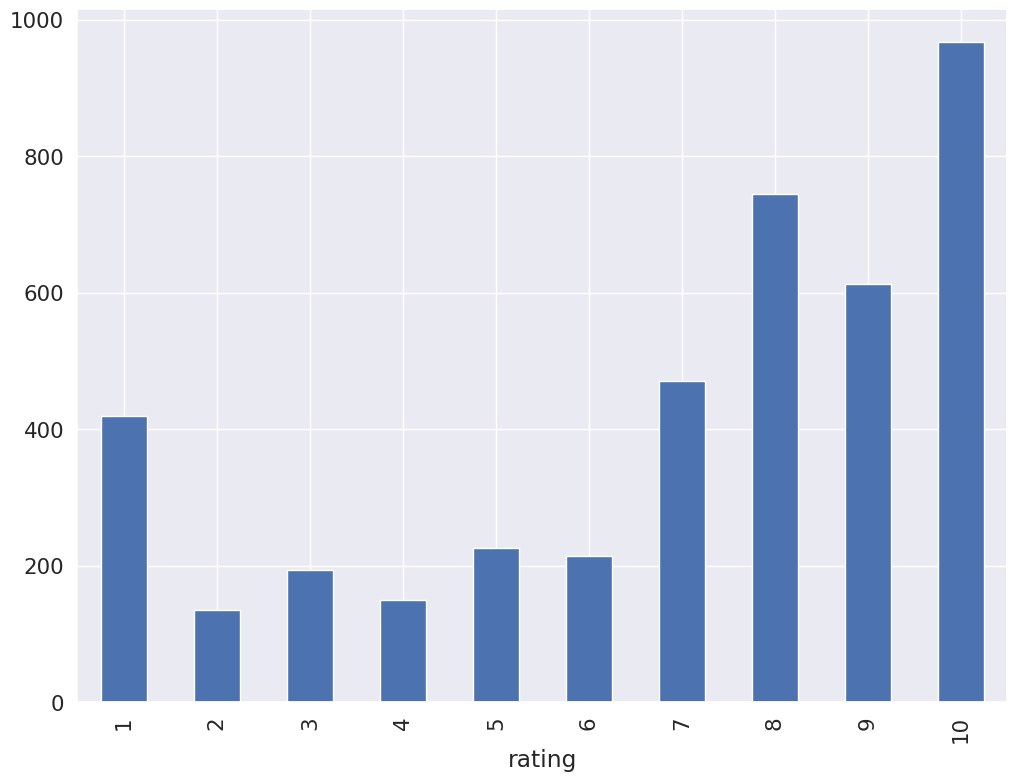

In [ ]:
df.groupby('rating').size().plot(kind='bar')

In [ ]:
#most people rated at the extremes

avg_rating = df['rating'].groupby(df['urlDrugName']).mean()
avg_rating

urlDrugName
0      5.375000
1      9.000000
2      1.000000
3      9.000000
4      7.727273
         ...   
535    5.562500
536    6.000000
537    7.781250
538    7.000000
539    9.000000
Name: rating, Length: 540, dtype: float64

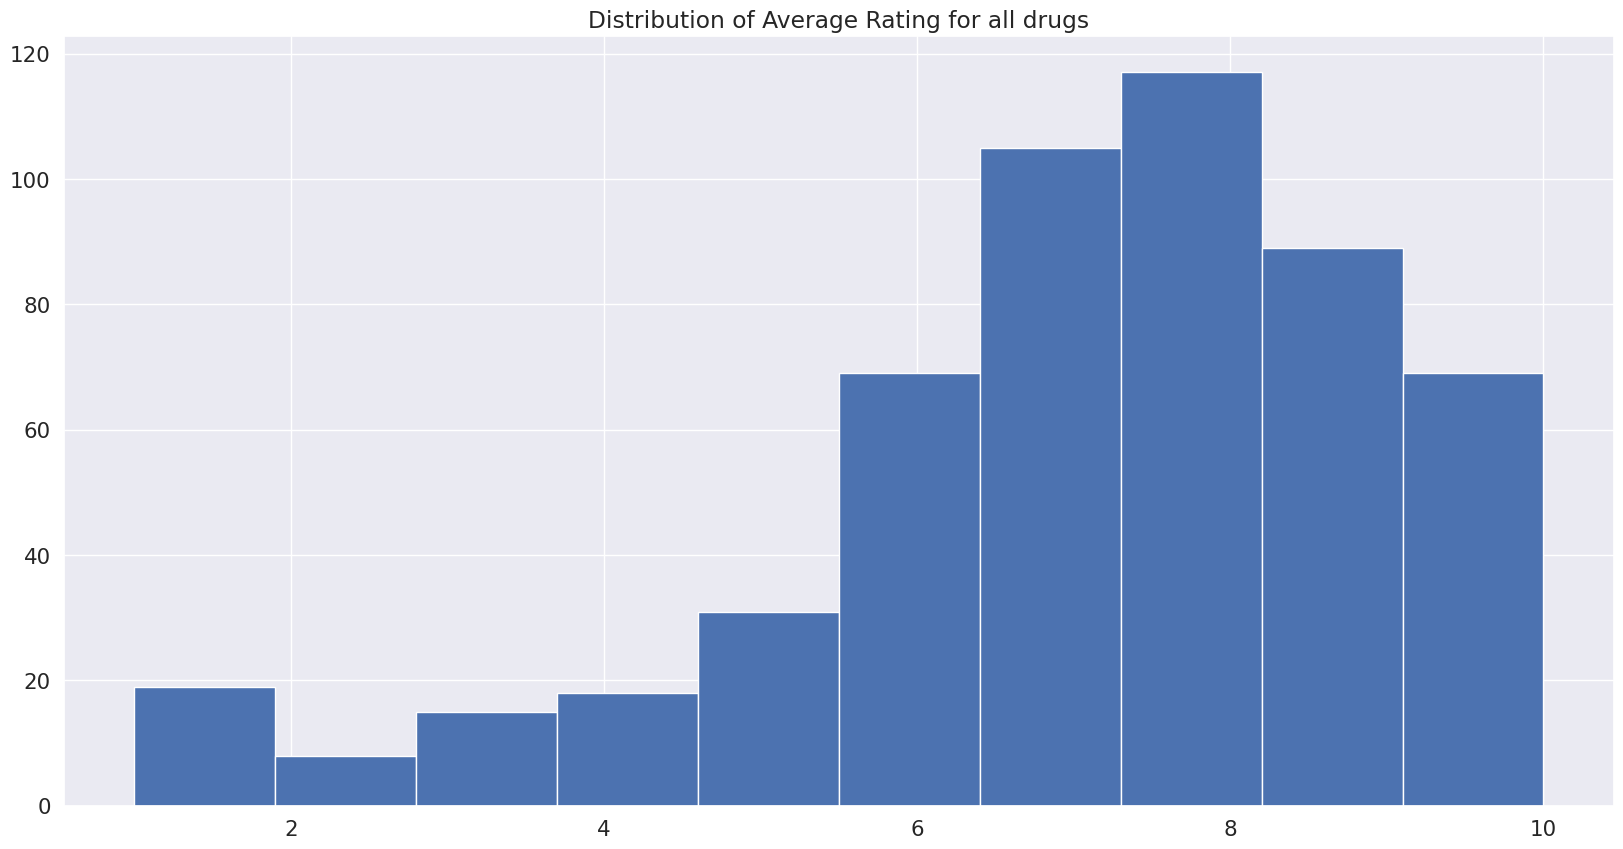

In [ ]:
#average rating for all drugs

plt.figure(figsize = (20,10))
avg_rating.hist()
plt.title("Distribution of Average Rating for all drugs")
plt.show()

In [ ]:
#which drugs have the highest mean/average rating
avg_rating.nlargest(20)

urlDrugName
34     10.0
50     10.0
53     10.0
57     10.0
61     10.0
68     10.0
78     10.0
81     10.0
84     10.0
91     10.0
130    10.0
143    10.0
163    10.0
178    10.0
181    10.0
182    10.0
186    10.0
189    10.0
200    10.0
204    10.0
Name: rating, dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'Review', 'Review_Sentiment', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss_1', 'sentiment_clean_ss_1',
       'count_word_1', 'count_unique_word_1', 'count_letters_1',
       'count punctuations_1', 'count_words_upper_1', 'count_words_title_1',
       'count_stopwords_1', 'mean_word_len_1'],
      dtype='object')

In [ ]:
### question on Review
# how genuine is the review? (using sentiment analysis)
# how many reviews are positive, negative, neutral?
# correlation between rating and review and users who found the review useful?
# distribution of rating
# amount of review made per year and per month
# which condition has the most review on drugs
# can you predict the rating using the review?


In [ ]:
# how genuine is the review? (using sentiment analysis)

from textblob import TextBlob

In [ ]:
df['commentsReview']

0       Took the antibiotics for 14 days. Sinus infect...
1       Severe mood swings between hypomania and depre...
2       Depakote was prescribed to me by a Kaiser psyc...
3       This drug may not be for everyone but its wond...
4       Drug was taken in gelatin tablet at 0.5 mg per...
                              ...                        
4138    I took adderall once as a child, and it made m...
4139    I was on Zoloft for about 2 years total. I am ...
4140                                                  ---
4141    Started at 2 doses of 300 mg a day and worked ...
4142             I take Micardis in pill form once daily.
Name: commentsReview, Length: 4132, dtype: object

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
  blob = TextBlob(text)
  if blob.polarity > 0:
    result = 'positve'
  elif blob.polarity < 0:
    result = 'negative'
  else:
    result = 'neutral'

  return result


In [ ]:
get_sentiment('I love grapes')

0.5

In [ ]:
get_sentiment_label('I love grapes')

'positve'

In [ ]:
text =''
for i in range(len(df['commentsReview'])):
  text = (df['commentsReview'][i])
  i = i + 1
  print(i)
  print(text)

df['sentiment'] = df['commentsReview'].apply(get_sentiment(text))

1
Took the antibiotics for 14 days. Sinus infection was gone after the 6th day.
2
Severe mood swings between hypomania and depression with suicide ideation before Lamictal. Began with 10mg and tritrated up to 400mg over a few months. Played around with the dosage to finally arrive at 400mg. Experimented with taking it at different times in the evening. Found that most comfortable time is before sleep.
3
Depakote was prescribed to me by a Kaiser psychiatrist in Pleasant Hill, CA in 2006.  The medication was given to help treat the diagnosis of Bipolar Disorder, Type II.  My disease was misdiagnosed for several years as depression, since I was never seen by a professional during hypomanic episodes, and when I did see a professional, I did not think that my manic symptoms were signs of a serious psychiatric problem.  Anti-depressant drugs were prescribed: Prozac in 2001, which had minimal effect and I stopped taking them a few months later. Wellbutrin was prescribed again for "chronic dep

KeyError: ignored